In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
data= pd.read_csv('SBI_Life_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
data.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [4]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

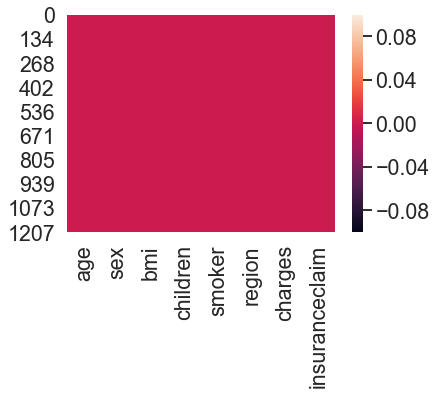

In [87]:
sns.heatmap(data.isnull())

i.e no NaN values present in the dataset... lets continew

In [6]:
data.shape

(1338, 8)

In [7]:
data.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [9]:
#checking duplicated values
data.duplicated().sum()

1

In [10]:
#i.e there is one duplicated raw data available in the dataset,,,,lets remove it..
data.loc[data.duplicated(), :]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [13]:
#droping duplicates
data.drop_duplicates(keep='first',inplace=True)

In [14]:
data.shape

(1337, 8)

In [21]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487,0.584892
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656,0.492925
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300,1.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [22]:
data.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308,0.114748
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044,0.030962
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401,0.384307
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389,-0.409189
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234,0.333701
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547,0.021193
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000,0.310213
insuranceclaim,0.114748,0.030962,0.384307,-0.409189,0.333701,0.021193,0.310213,1.000000


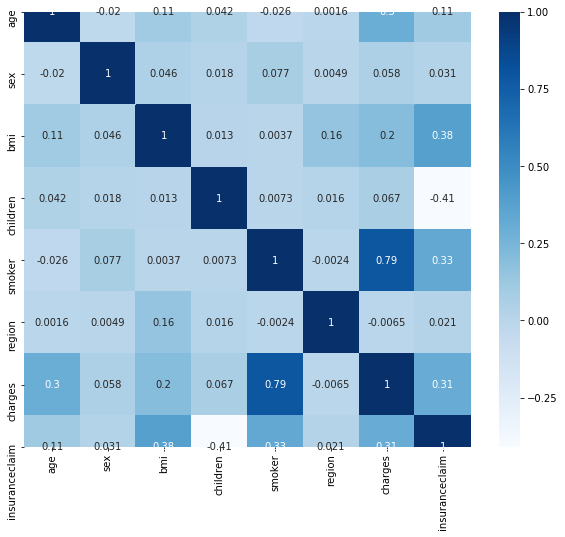

In [24]:
sns.color_palette
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='Blues',annot= True)

Text(0.5, 1.0, 'Graph to show Frequency of Sex')

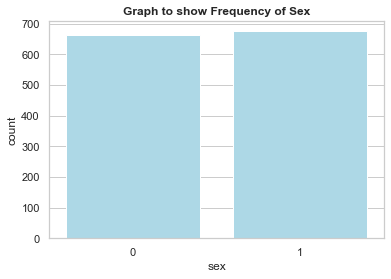

In [50]:
#countplot for sex
sns.set(style='whitegrid')
sns.set_context('notebook',font_scale=1.0)
sns.countplot(x='sex',data=data,saturation=21,color='lightblue')
plt.title('Graph to show Frequency of Sex',weight='bold')

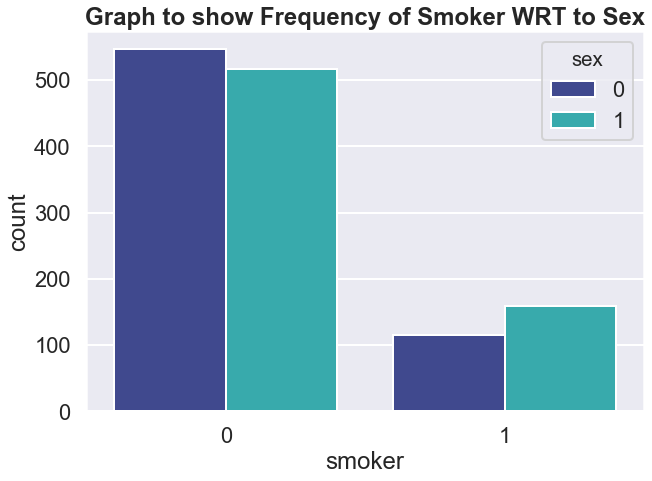

In [42]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.set_context('poster',font_scale=1.0)
sns.countplot(x='smoker',data=data,hue='sex',saturation=21,palette='mako')
plt.title('Graph to show Frequency of Smoker WRT to Sex',weight='bold')
plt.show()

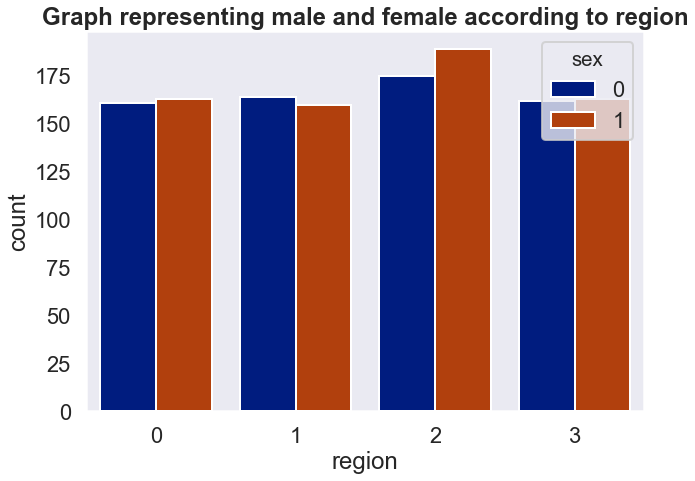

In [49]:
plt.figure(figsize=(10,7))
sns.set(style='dark')
sns.set_context('poster',font_scale=1)
sns.countplot(x='region',data=data,hue='sex',saturation=21,palette='dark')
plt.title('Graph representing male and female according to region', weight ='bold')
plt.show()

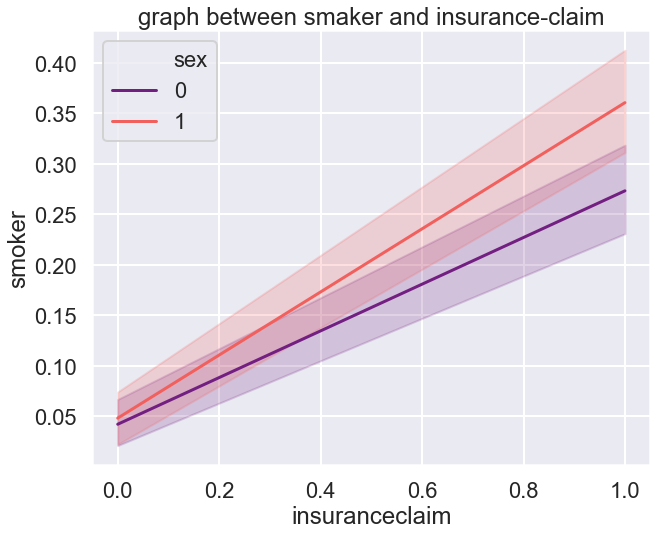

In [60]:
#smoker vs insuranceclaim lineplot
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.set_context('poster',font_scale=1)
sns.lineplot(x='insuranceclaim',y='smoker',data=data,hue='sex',palette='magma')
plt.title('graph between smaker and insurance-claim')
plt.show()

# this implies high smoking in male or female leads to high insurance claim

# lets plot outliers

In [73]:
clm=data.columns.values
print(clm)

['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges' 'insuranceclaim']


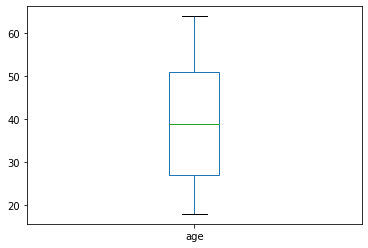

In [26]:
data['age'].plot.box()

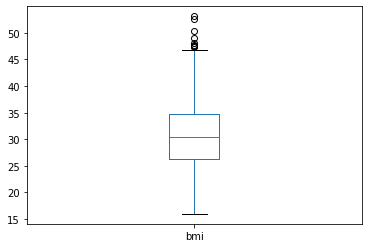

In [27]:
data['bmi'].plot.box()

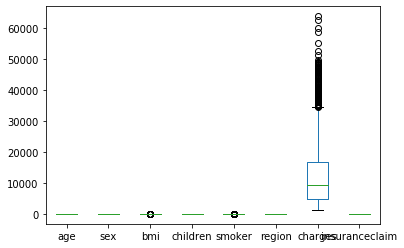

In [31]:
data.plot.box()

In [76]:
clm

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'], dtype=object)

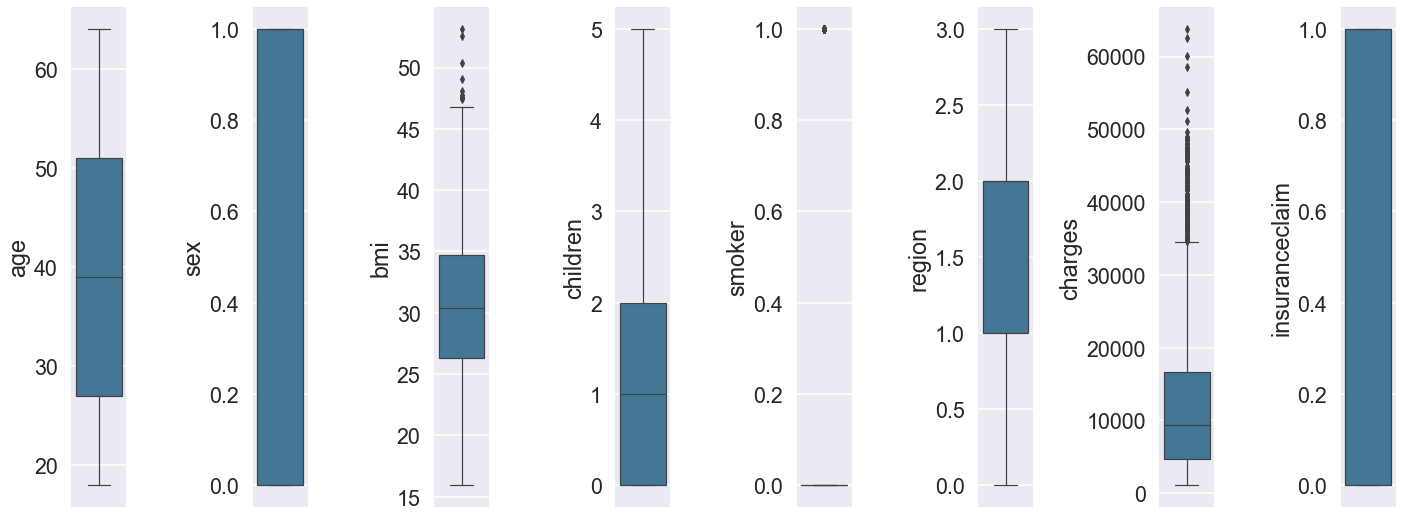

In [82]:
plt.figure(figsize=(20,15))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.3)
for i in range(0,8):
    plt.subplot(2,8,i+1)
    sns.boxplot(x=data[clm[i]],data=data,palette='mako',orient='v',linewidth=1.2)    
plt.tight_layout()

lets remove outliersfrom the dataset

In [88]:
z=np.abs(zscore(data))
z

array([[1.44041773, 1.00977099, 0.45315959, ..., 1.34316271, 0.2978567 ,
        0.84244802],
       [1.51164747, 0.99032355, 0.50942165, ..., 0.43801727, 0.9543806 ,
        0.84244802],
       [0.79935006, 0.99032355, 0.3831546 , ..., 0.43801727, 0.72937251,
        1.18701685],
       ...,
       [1.51164747, 1.00977099, 1.01448983, ..., 0.43801727, 0.96228744,
        0.84244802],
       [1.29795825, 1.00977099, 0.79752426, ..., 1.34316271, 0.9310536 ,
        1.18701685],
       [1.55123139, 1.00977099, 0.26129928, ..., 0.46712816, 1.31029752,
        0.84244802]])

In [89]:
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
       1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [93]:
#checking z>3
z[32][3] , z[34][6] , z[1316][2] , z[1299][6]

(3.2397285521666808, 3.1319982217432654, 3.6841359219939767, 4.07355398983613)

In [94]:
df=data[(z<3).all(axis=1)]
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [95]:
print('Earlier shape of data was:',data.shape,'\n after removing outliers shape of data is:',df.shape)

Earlier shape of data was: (1337, 8) 
 after removing outliers shape of data is: (1308, 8)


In [96]:
df.skew()

age               0.050421
sex              -0.009185
bmi               0.191361
children          0.737050
smoker            1.481539
region           -0.024001
charges           1.436653
insuranceclaim   -0.351245
dtype: float64

In [97]:
#skew of 0.55 is allowable so any attribute having skew value more than 0.55 will be treated as skewed data and that must be removed.
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
print(df.skew())

age               0.050421
sex              -0.009185
bmi               0.191361
children          0.224207
smoker            1.481539
region           -0.024001
charges          -0.106876
insuranceclaim   -0.351245
dtype: float64


In [100]:
#plotting the correlation table after cleaning the dataset
df_corr=df.corr()
print(df_corr)

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.018180  0.118272  0.058937 -0.029671  0.002619   
sex            -0.018180  1.000000  0.042514  0.014832  0.079479  0.003434   
bmi             0.118272  0.042514  1.000000  0.029019 -0.005289  0.160139   
children        0.058937  0.014832  0.029019  1.000000  0.027310  0.001372   
smoker         -0.029671  0.079479 -0.005289  0.027310  1.000000 -0.003651   
region          0.002619  0.003434  0.160139  0.001372 -0.003651  1.000000   
charges         0.530418  0.008574  0.133848  0.185003  0.659050 -0.045385   
insuranceclaim  0.110427  0.027139  0.383692 -0.420175  0.330637  0.026426   

                 charges  insuranceclaim  
age             0.530418        0.110427  
sex             0.008574        0.027139  
bmi             0.133848        0.383692  
children        0.185003       -0.420175  
smoker          0.659050        0.330637  
region         -0.045385        0.02642

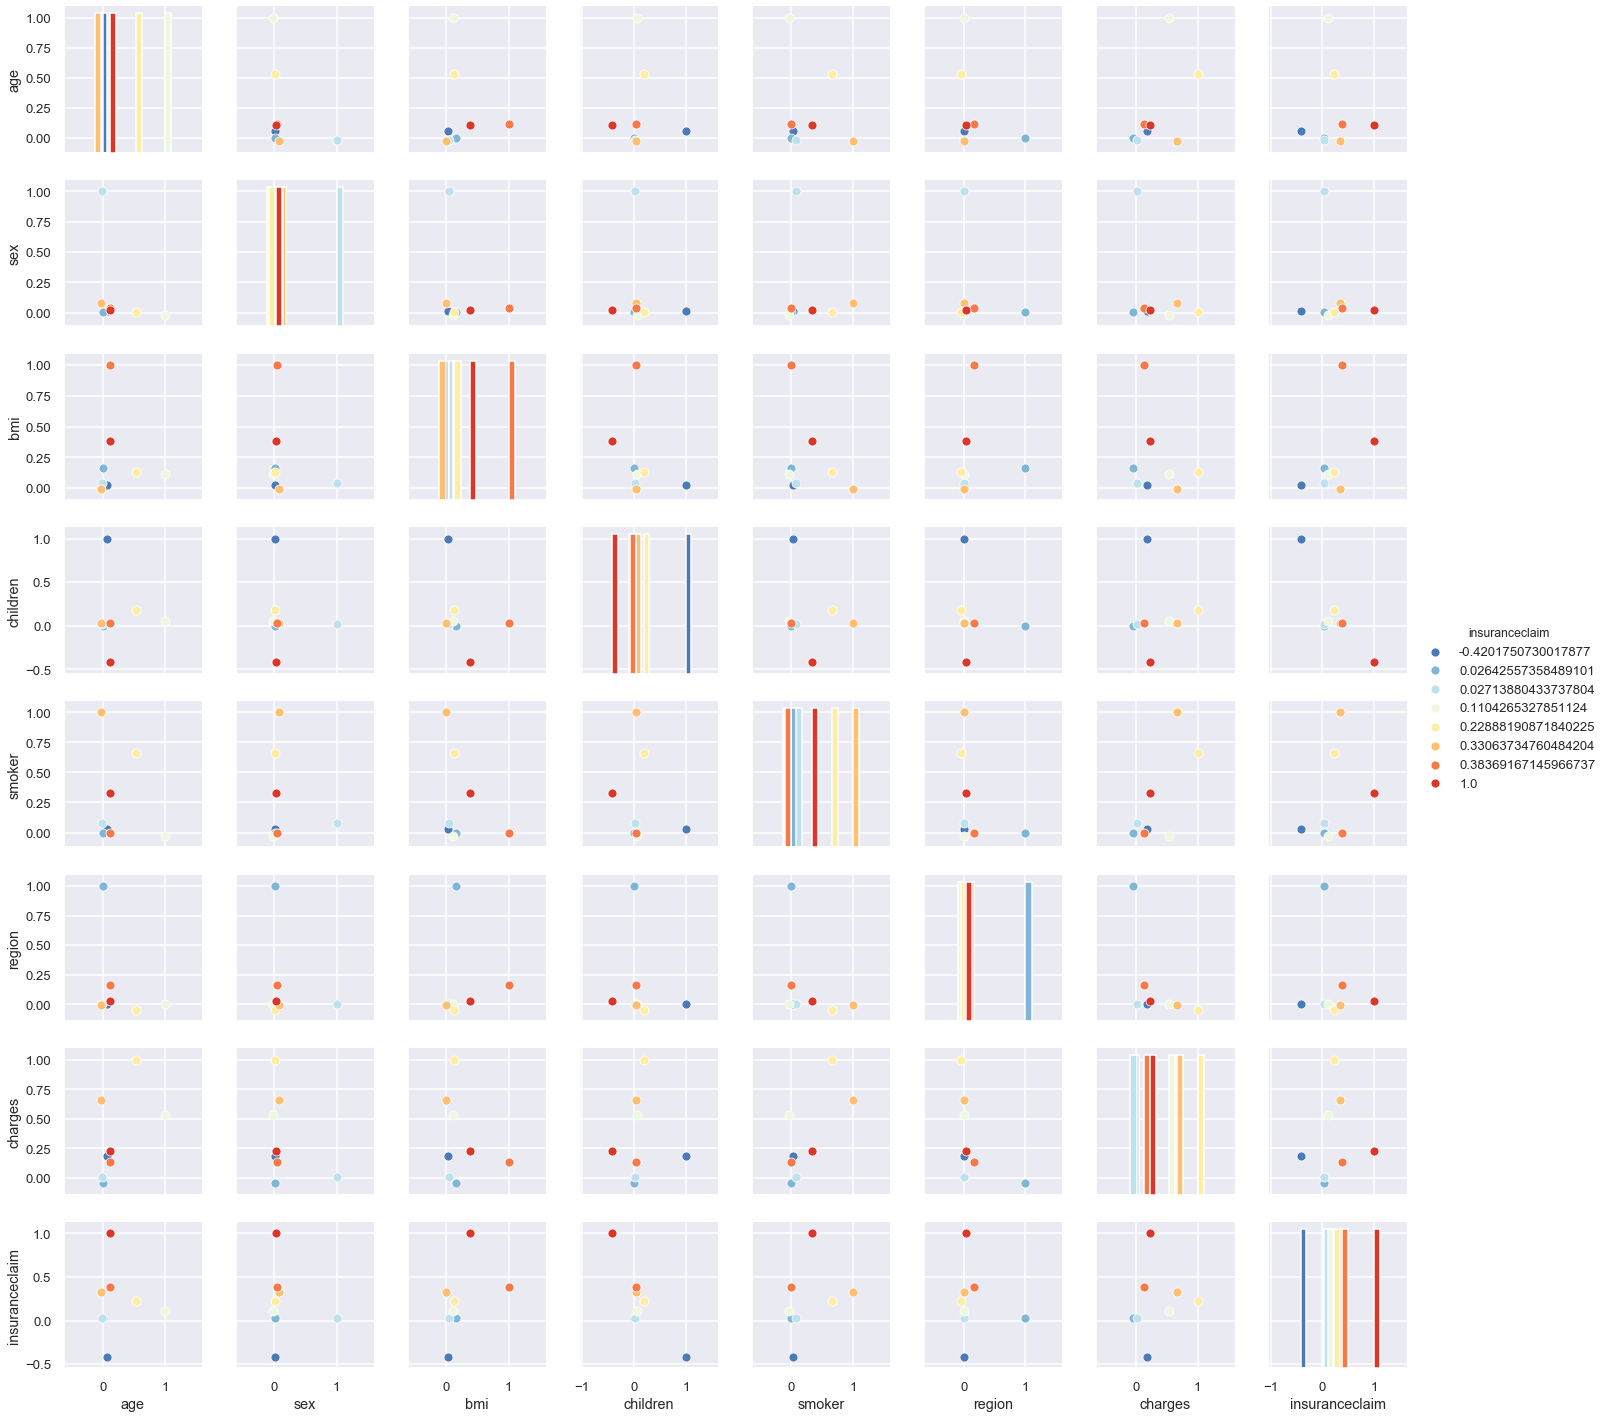

In [101]:
#pairplot to see the corelation
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=0.8)
sns.pairplot(df_corr,hue='insuranceclaim',palette='RdYlBu_r',diag_kind='hist')
plt.show()

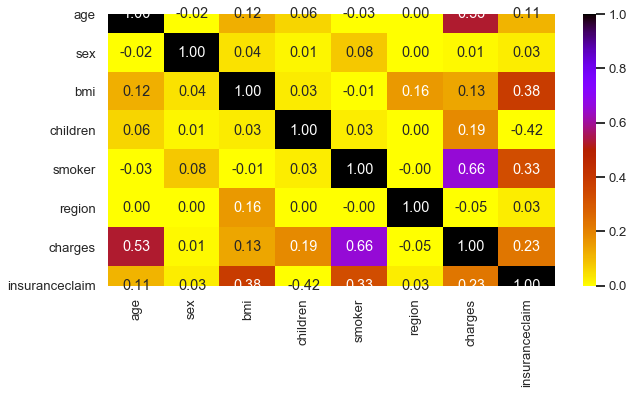

In [102]:
#heatmap to visualize the co-relations
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='gnuplot_r')
plt.show()

here the target variable is giving categorical value i.e 0,1  . 
we can use LogisticRegression(),DecisionTreeClassifier(),SupportVectorClassifier(),KNeighborClassifier() and GaussianNB()for
best parameters for each model. 

In [104]:
#defining x and y 
x=df.iloc[:,0:-1]
print(x.head())
y=df.iloc[:,-1]
print(y.head())

   age  sex     bmi  children    smoker  region   charges
0   19    0  27.900  0.000000  0.693147       3  9.734236
1   18    1  33.770  0.693147  0.000000       2  7.453882
2   28    1  33.000  1.386294  0.000000       2  8.400763
3   33    1  22.705  0.000000  0.000000       1  9.998137
4   32    1  28.880  0.000000  0.000000       1  8.260455
0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64


In [105]:
print(x.shape)
print(y.shape)

(1308, 7)
(1308,)


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc
import joblib
import warnings
warnings.filterwarnings('ignore')

In [107]:
ss=StandardScaler()
x=ss.fit_transform(x)
print(x,'\n\n\n shape of x:',x.shape)

[[-1.44075415 -1.00459773 -0.44918647 ...  1.98389744  1.35199437
   0.70235052]
 [-1.51180593  0.99542332  0.5331877  ... -0.50405831  0.4469746
  -1.79397356]
 [-0.80128811  0.99542332  0.40432431 ... -0.50405831  0.4469746
  -0.7574139 ]
 ...
 [-1.51180593 -1.00459773  1.04864127 ... -0.50405831  0.4469746
  -1.85641061]
 [-1.29865058 -1.00459773 -0.80063208 ... -0.50405831  1.35199437
  -1.62814354]
 [ 1.54342071 -1.00459773 -0.25338105 ...  1.98389744 -0.45804517
   1.29974687]] 


 shape of x: (1308, 7)


In [108]:
y=np.array(y)
print(y.shape)

(1308,)


In [109]:
y=y.reshape(-1,1)
print(y.shape)

(1308, 1)


In [112]:
def acusr(model,x,y):
    max_acu_score=0
    for rs in range (25,150):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=rs,test_size=.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acsr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        if acsr>max_acu_score:
            max_acu_score=acsr
            final_rs=rs
                     
    print("In this",model,'\nThe best suited random_score is: ', final_rs, '\nWith an accuracy score of: ', max_acu_score)
    print('f1_score:', f1)
    print('Confusion matrix:\n')
    print(conf)
    return final_rs

In [113]:
logreg=LogisticRegression()
logregm=acusr(logreg,x,y)

In this LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 
The best suited random_score is:  30 
With an accuracy score of:  0.8990825688073395
f1_score: 0.8746803069053708
Confusion matrix:

[[107  25]
 [ 24 171]]


In [114]:
#cross_val_score to check for over/under fitting of logistic regressor model
logi_scr=cross_val_score(logreg,x,y,scoring='accuracy',cv=30)

In [115]:
print('The mean accuracy score produced by the Logistic Regressor Model is= ', logi_scr.mean())


The mean accuracy score produced by the Logistic Regressor Model is=  0.8700775193798452


In [116]:
#using DecisionTreeClassifier algo with grid_search_cv to get best parameters for optimum performance
dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10)}
dtc_gs=GridSearchCV(dtc,dtc_para,cv=30)
dtc_gs.fit(x,y)
print(dtc_gs)
print(dtc_gs.best_params_)

GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                        

In [117]:
#using the parameters obtained from GridSearchCV to create a optimum result producing model

dtc=DecisionTreeClassifier(criterion='gini',max_depth=9,splitter='best')
dtcm=acusr(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 
The best suited random_score is:  132 
With an accuracy score of:  1.0
f1_score: 0.9744897959183674
Confusion matrix:

[[126   6]
 [  4 191]]


In [118]:
#cross_val_score to check for over/under fitting of dtc model
dtc_scr=cross_val_score(dtc,x,y,scoring='accuracy',cv=30)

In [119]:
print('The mean accuracy score produced by DTC model is = ', dtc_scr.mean())

The mean accuracy score produced by DTC model is =  0.9846723044397462


In [120]:
#using KNeighborsClassifier algo with grid_search_cv to get best parameters for optimum performance
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[10,30,35]}
knc_grd=GridSearchCV(knc,knc_para,cv=30)
knc_grd.fit(x,y)
print(knc_grd)
print(knc_grd.best_params_)

GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 35],
                         'n_neighbors': range(20, 65)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 22}


In [121]:
#using the parameters obtained from GridSearchCV to create a optimum result producing model
knc=KNeighborsClassifier(algorithm='ball_tree',leaf_size=10, n_neighbors=22)
kncm=acusr(knc,x,y)

In this KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform') 
The best suited random_score is:  77 
With an accuracy score of:  0.9051987767584098
f1_score: 0.8608923884514437
Confusion matrix:

[[110  22]
 [ 31 164]]


In [122]:
#checking for under/over fitting of the knc  model
knc_scr=cross_val_score(knc,x,y,scoring='accuracy',cv=30)

In [123]:
print('The mean accuracy score produced by the KNC model is: ',knc_scr.mean() )

The mean accuracy score produced by the KNC model is:  0.8631735964294105


In [124]:
#using SupportVectorClassifier algo with grid_search_cv to get best parameters for optimum performance
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1],'degree':[3,5,7,9],'C':[3,5,6]}
svc_grid=GridSearchCV(svc,svc_para,cv=30)
svc_grid.fit(x,y)
print(svc_grid)
print(svc_grid.best_params_)

GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [3, 5, 6], 'degree': [3, 5, 7, 9],
                         'gamma': [0.01, 0.1],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
{'C': 3, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}


In [125]:
#using the parameters obtained from GridSearchCV to create a optimum result producing model

svc=SVC(kernel='rbf',gamma=0.1,degree=3,C=3)
svcm=acusr(svc,x,y)

In this SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
The best suited random_score is:  77 
With an accuracy score of:  0.9418960244648318
f1_score: 0.9095744680851064
Confusion matrix:

[[122  10]
 [ 24 171]]


In [126]:
#checking for under/over fitting of the svc model
svc_scr=cross_val_score(svc,x,y,scoring='accuracy',cv=30)

In [127]:
print('The accuracy score produced by the SVC model is: ',svc_scr.mean())

The accuracy score produced by the SVC model is:  0.9097740975647954


In [128]:
#using GaussianNB algo to built the model
gnb=GaussianNB()
gnbm=acusr(gnb,x,y)

In this GaussianNB(priors=None, var_smoothing=1e-09) 
The best suited random_score is:  86 
With an accuracy score of:  0.8470948012232415
f1_score: 0.8011363636363635
Confusion matrix:

[[116  16]
 [ 54 141]]


In [129]:
#checking for under/over fitting of the gnb model
gnb_scr=cross_val_score(gnb,x,y,scoring='accuracy',cv=30)

In [130]:
print('The accuracy score produced by the GNB model is: ',gnb_scr.mean() )

The accuracy score produced by the GNB model is:  0.7952513507164671


In [131]:
#so we got the following accuracy scores,f1 score from the above algorithms
info=[['LREG',0.90,0.88],['DTC',0.98,0.97],['KNC',0.86,0.86,],['SVC',0.90,0.89],['GNB',0.80,0.80]]
perf=pd.DataFrame(info,columns=['MODEL_NAME','ACCURACY_SCORE','F1_SCORE'])
perf

,MODEL_NAME,ACCURACY_SCORE,F1_SCORE
0,LREG,0.90,0.88
1,DTC,0.98,0.97
2,KNC,0.86,0.86
3,SVC,0.90,0.89
4,GNB,0.80,0.80


DTCmodel is selected as it shows highest performance with accuracy score:.98 and f1 score:.97

In [132]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=9,splitter='best')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=132)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
ascr=accuracy_score(pred,y_test)
f1=f1_score(pred,y_test)
clr=classification_report(y_test,pred)
conf=confusion_matrix(y_test,pred)
print("pred=:\n", pred ,'\n')
print('The accuracy score is:', ascr)
print('Confusion matrix:\n', conf)
print('the classification report:\n', clr)

pred=:
 [0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0
 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1
 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1
 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 1 1 0 0 1 1 1 1 1] 

The accuracy score is: 0.9759825327510917
Confusion matrix:


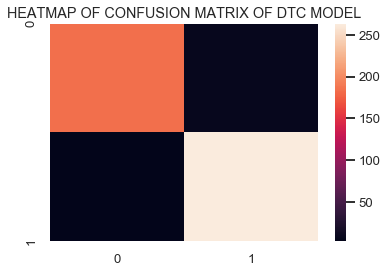

In [135]:
#using heatmap to visualize the confusion matrix for batter understanding
sns.heatmap(conf,annot=False)
plt.title('HEATMAP OF CONFUSION MATRIX OF DTC MODEL')
plt.show()

In [136]:
#as it's a classification problem, we can implement the AUC - ROC Curve to check and visualize the performance.

In [137]:
tpr,fpr,threshold=roc_curve(y_test,pred)

In [138]:
tpr.mean()

0.34722222222222227

In [139]:
fpr.mean()

0.6629072681704261

In [140]:
threshold

array([2, 1, 0], dtype=int64)

In [141]:
scores=roc_auc_score(y_test,pred)
scores

0.9735275689223059

In [142]:
roc_auc=auc(tpr,fpr)
roc_auc

0.9735275689223059

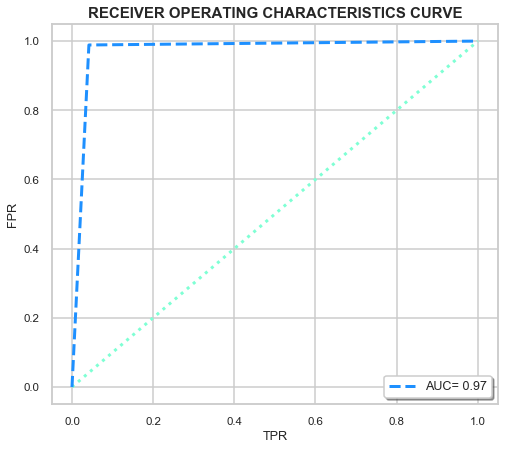

In [143]:
#plotting the auc_roc curve
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
plt.figure(figsize=(8,7))
plt.plot([0,1],[0,1],color='aquamarine',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % roc_auc,color='dodgerblue',lw=3,linestyle='--')
plt.legend(loc='lower right',fontsize='medium',shadow=True)
plt.xlabel("TPR")
plt.ylabel('FPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='center')
plt.show()

In [144]:
#saving dtc as final model
#joblib.dump(dtc,"INSURANCE_DTC.pkl")